In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных из Excel-файла и первичный анализ
target_xlsx ='https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'
df = pd.read_excel(target_xlsx)

##**Первичный анализ**

In [3]:
# Вывод первых строк и информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [4]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


Датасет включает в себя 1001 запись, содержащую 214 признаков.

Некоторые из ключевых характеристик включают:

- IC50, мМ — концентрация вещества, при которой наблюдается 50% ингибирование активности (измеряет эффективность лекарства), выраженная в миллимолях.

- CC50, мМ — концентрация, вызывающая гибель 50% клеток (измеряет токсичность), также в миллимолях.

- SI (селективный индекс) — определяется как отношение CC50 к IC50 и отражает терапевтическое окно.

Перед нами стоят несколько ключевых задач:

1. Изучить, как проводить регрессионный анализ для прогнозирования IC50, CC50 и SI.
2. Научиться классифицировать данные на основе превышения медианных значений для IC50, CC50 и SI.
3. Освоить классификацию на основе условия SI > 8.

Для упрощения анализа данных (EDA), мы разделим его на три части: каждая часть будет посвящена одному из признаков — IC50, CC50 и SI.

В качестве первого шага мы вычислим медианные значения для всех трех признаков.

In [5]:
# Вычисляем медианы для интересующих нас столбцов
print('Медианы столбцов')
for column in  ['IC50, mM', 'CC50, mM', 'SI']:
    print(f'{column} : {df[column].median()}')

Медианы столбцов
IC50, mM : 46.58518345980803
CC50, mM : 411.0393423370522
SI : 3.846153846153846


In [6]:
# Проверка на наличие пропущенных значений
nan_counts = df.isnull().sum()
print("Количество пропущенных значений:")
print(nan_counts[nan_counts > 0])

Количество пропущенных значений:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


В нашем датасете имеются пропуски в следующих колонках:

- MaxPartialCharge
- MinPartialCharge
- MaxAbsPartialCharge
- MinAbsPartialCharge
- BCUT2D_MWHI
- BCUT2D_MWLOW
- BCUT2D_CHGHI
- BCUT2D_CHGLO
- BCUT2D_LOGPHI
- BCUT2D_LOGPLOW
- BCUT2D_MRHI
- BCUT2D_MRLOW

В общей сложности данные с пропусками составляют лишь 3 записи, что эквивалентно 0,3% от всего объема датасета. Таким образом, эти записи можно безопасно удалить. Также мы исключим первый столбец, поскольку он не содержит значимой информации.

In [21]:
# Удаление строк с пропущенными значениями
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')  # безопасное удаление
print("После удаления пропусков:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB
После удаления пропусков:
 None


## **Анализ IC50, mM**

In [116]:
target = 'IC50, mM'
print(f"Описательная статистика для {target}:")
df[target].describe()

Описательная статистика для IC50, mM:


,"IC50, mM"
count,998.000000
mean,221.118757
std,400.510657
min,0.003517
25%,12.491340
50%,45.992006
75%,224.408630
max,4128.529377


In [104]:
# Вычисляем верхнюю и нижнюю границу
Q3, Q1 = np.percentile(df[target],[75,25])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

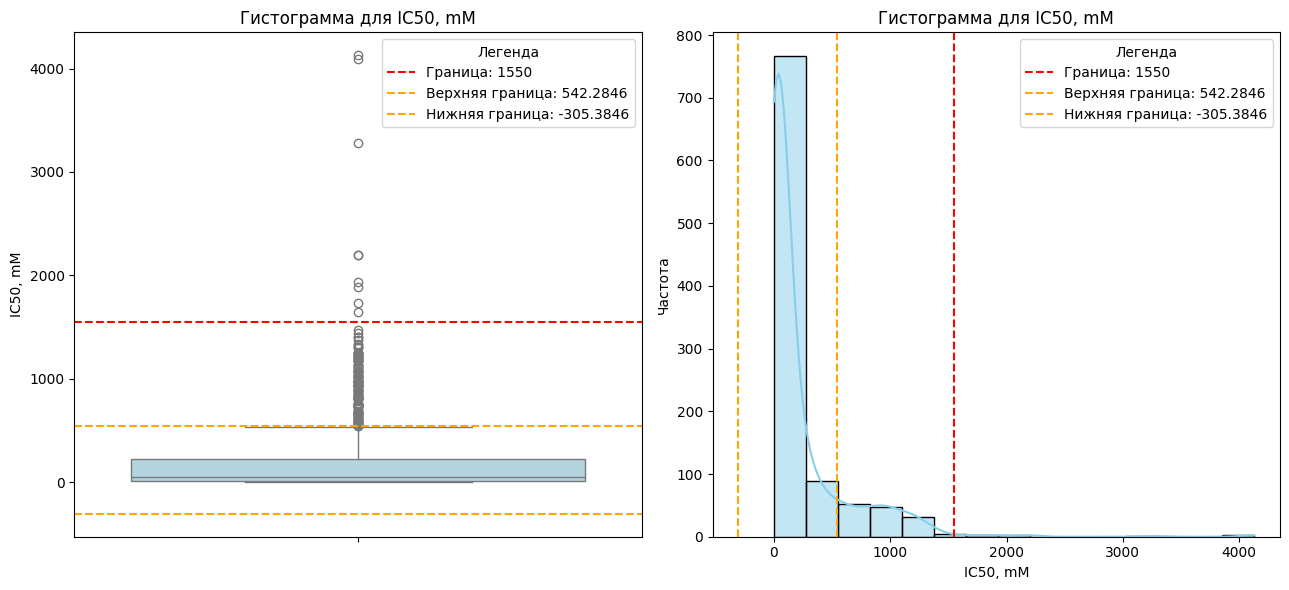

In [105]:
# Создаем Гистограммы
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# Гистограмма
sns.boxplot(y=df[target], color='lightblue', ax=axs[0])
axs[0].axhline(1550, color='red', linestyle='--', label=f'Граница: 1550')
axs[0].axhline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
axs[0].axhline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
axs[0].set_title(f'Гистограмма для {target}')
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')

# Гистограмма
sns.histplot(df[target], bins=15, color='skyblue', kde=True, ax=axs[1])
axs[1].axvline(1550, color='red', linestyle='--', label=f'Граница: 1550')
axs[1].axvline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
axs[1].axvline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
axs[1].set_title(f'Гистограмма для {target}')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')
axs[1].set_ylabel('Частота')  # Название оси Y для гистограммы
# Отображаем графики
plt.tight_layout()
plt.show()

In [106]:
# Подсчет количества значений выше границ
count_higher_than_upper_bound = df[df[target] > upper_bound].shape[0]
count_extreme = df[df[target] > 1550].shape[0]

print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"%: {count_higher_than_upper_bound / df.shape[0] * 100:.4f}")
print(f"Количество значений выше 1550: {count_extreme}. "
      f"%: {count_extreme / df.shape[0] * 100:.4f}")

Количество значений выше верхней границы: 145. %: 14.5291
Количество значений выше 1550: 9. %: 0.9018


In [107]:
# Фильтрация значений не входящих в границы
df_filtered = df[df[target] <= 1550]

In [108]:
# Корреляционный анализ
correlations = df_filtered.corr()[target].sort_values()
corr_map = {column: correlation for column, correlation in correlations.items()
                            if column != target and abs(correlation) >= 0.2}
print(f"Корреляции между {target} и")
for col, corr in corr_map.items():
   print(f"{col} составляет: \t{corr:.4f}")

Корреляции между IC50, mM и
VSA_EState4 составляет: 	-0.2820
MinEStateIndex составляет: 	-0.2532
SlogP_VSA5 составляет: 	-0.2383
PEOE_VSA7 составляет: 	-0.2303
Chi2v составляет: 	-0.2292
Chi2n составляет: 	-0.2280
NumAliphaticCarbocycles составляет: 	-0.2279
Chi4v составляет: 	-0.2249
Chi4n составляет: 	-0.2203
Chi3v составляет: 	-0.2180
SMR_VSA4 составляет: 	-0.2149
Chi3n составляет: 	-0.2148
VSA_EState7 составляет: 	-0.2131
EState_VSA8 составляет: 	-0.2113
NumSaturatedCarbocycles составляет: 	-0.2071
NumSaturatedHeterocycles составляет: 	0.2117
fr_alkyl_halide составляет: 	0.2363
CC50, mM составляет: 	0.4124


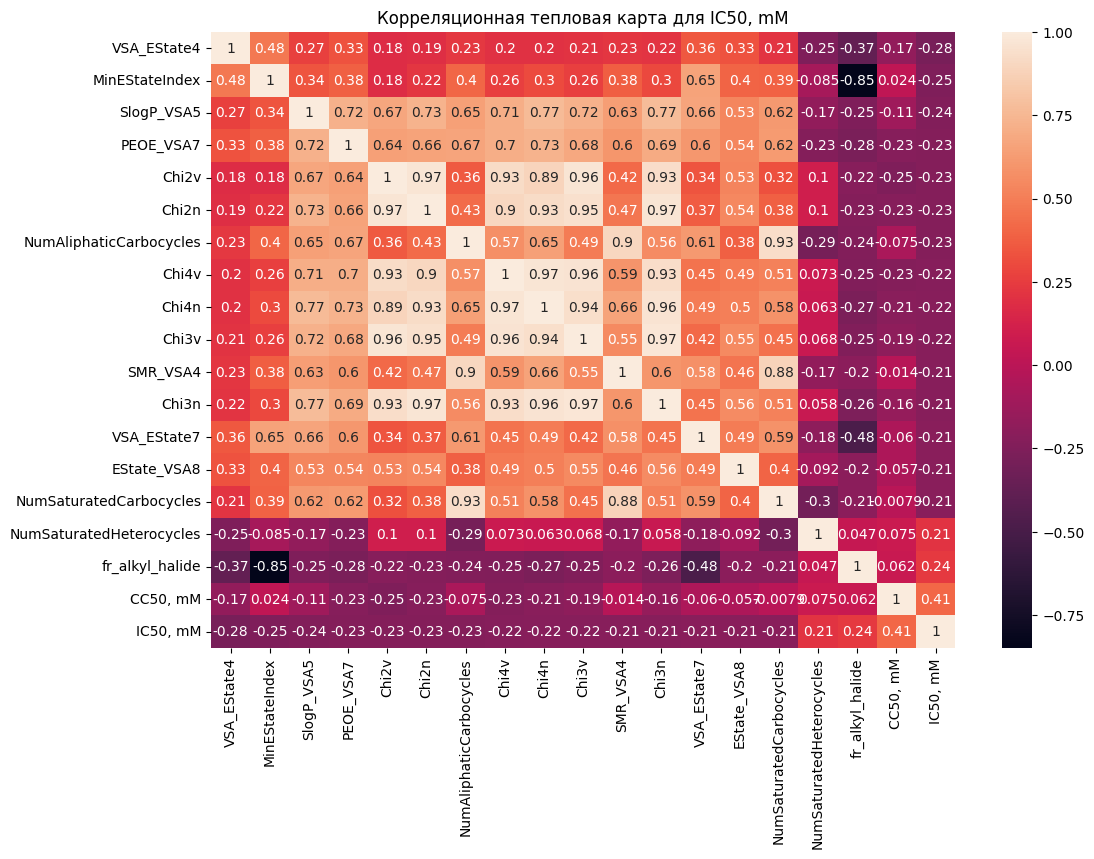

In [109]:
# Визуализация корреляций
df_filtered_corr = df_filtered[list(corr_map.keys()) + [target]]
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered_corr.corr(), annot=True)
plt.title(f'Корреляционная тепловая карта для {target}')
plt.show()

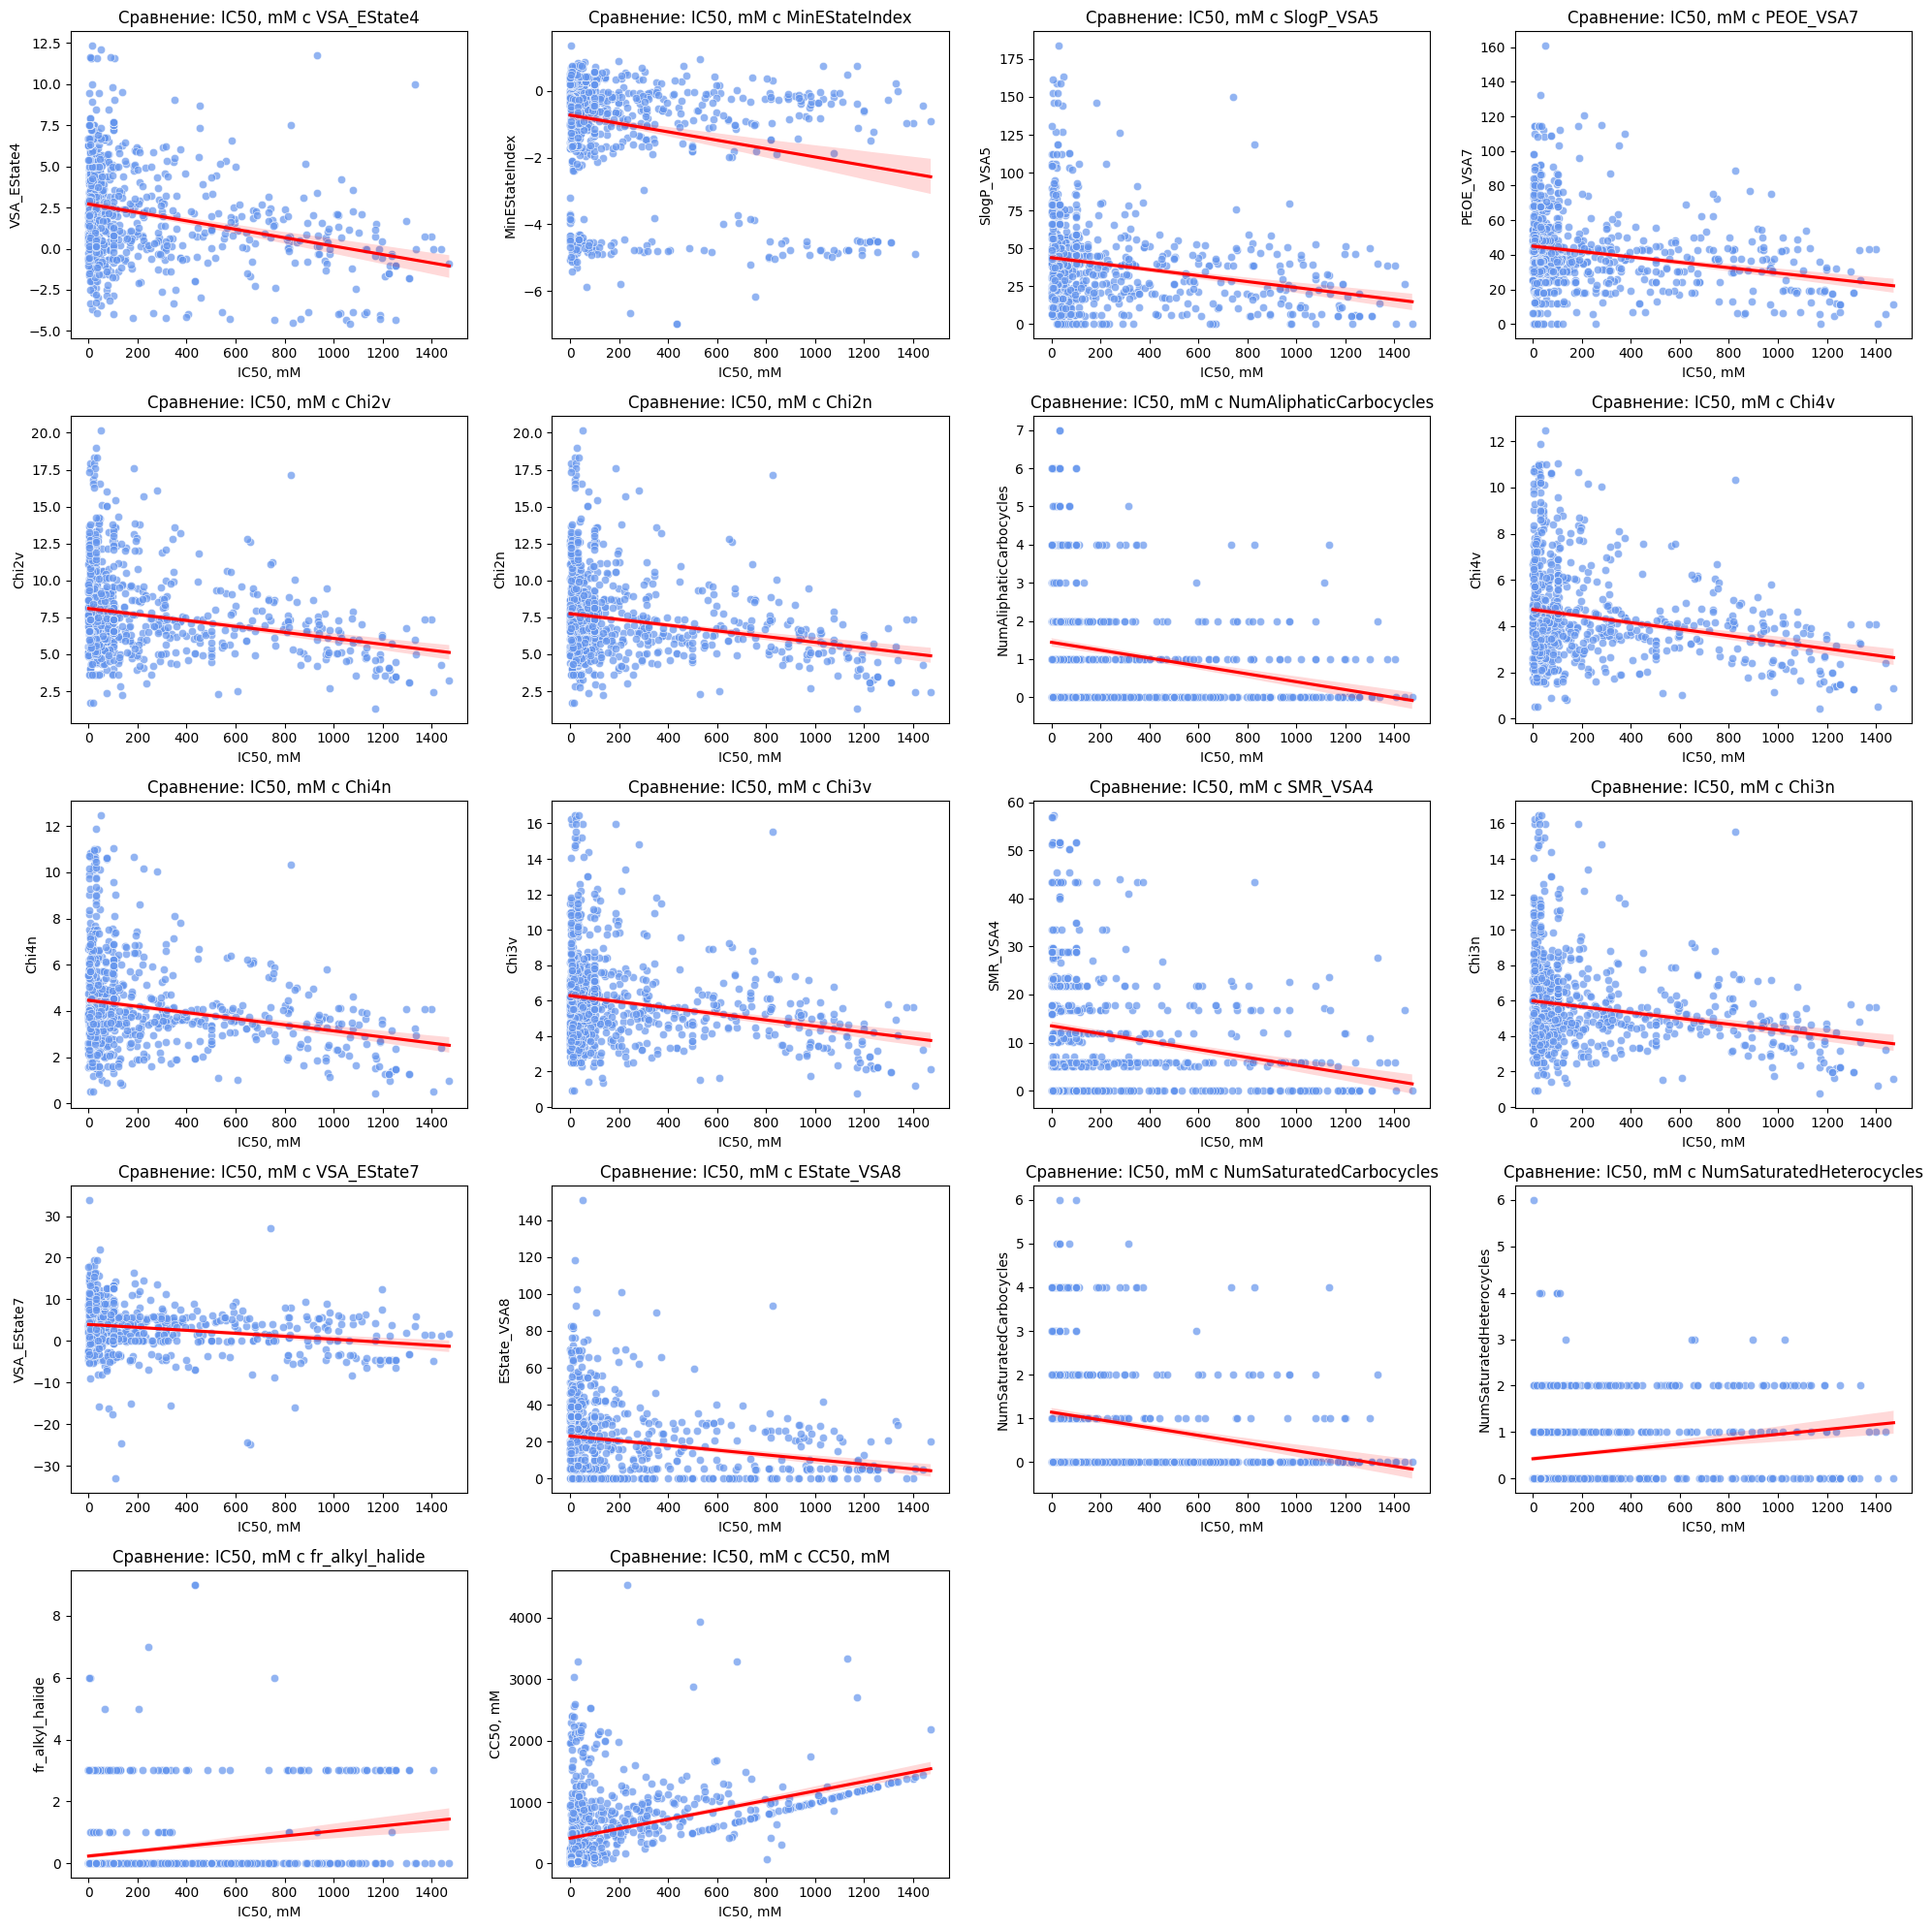

In [110]:
# Определяем размерность фигуры на основе количества подграфиков
x_size = 4
y_size = (len(corr_map) + x_size - 1) // x_size
fig, axes = plt.subplots(y_size, x_size, figsize=(20, y_size * 4))
axes = axes.flatten()

# Проходимся по каждому из коррелирующих признаков
for i, (col, _) in enumerate(corr_map.items()):
    sns.scatterplot(data=df_filtered, x=target, y=col, ax=axes[i], color='cornflowerblue', alpha=0.7)
    axes[i].set_title(f'Сравнение: {target} с {col}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

    # Добавляем линию регрессии для дополнительных данных
    sns.regplot(data=df_filtered, x=target, y=col, ax=axes[i],  scatter=False, color='red')

# Удаляем пустые подграфики, если они есть
for j in range(len(corr_map), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Анализ CC50**

In [115]:
target = 'CC50, mM'
print(f"Описательная статистика для {target}:")
df[target].describe()

Описательная статистика для CC50, mM:


,"CC50, mM"
count,998.000000
mean,586.668414
std,642.016454
min,0.700808
25%,99.999036
50%,408.793314
75%,891.770961
max,4538.976189


In [113]:
# Вычисляем верхнюю и нижнюю границу
Q3, Q1 = np.percentile(df[target],[75,25])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

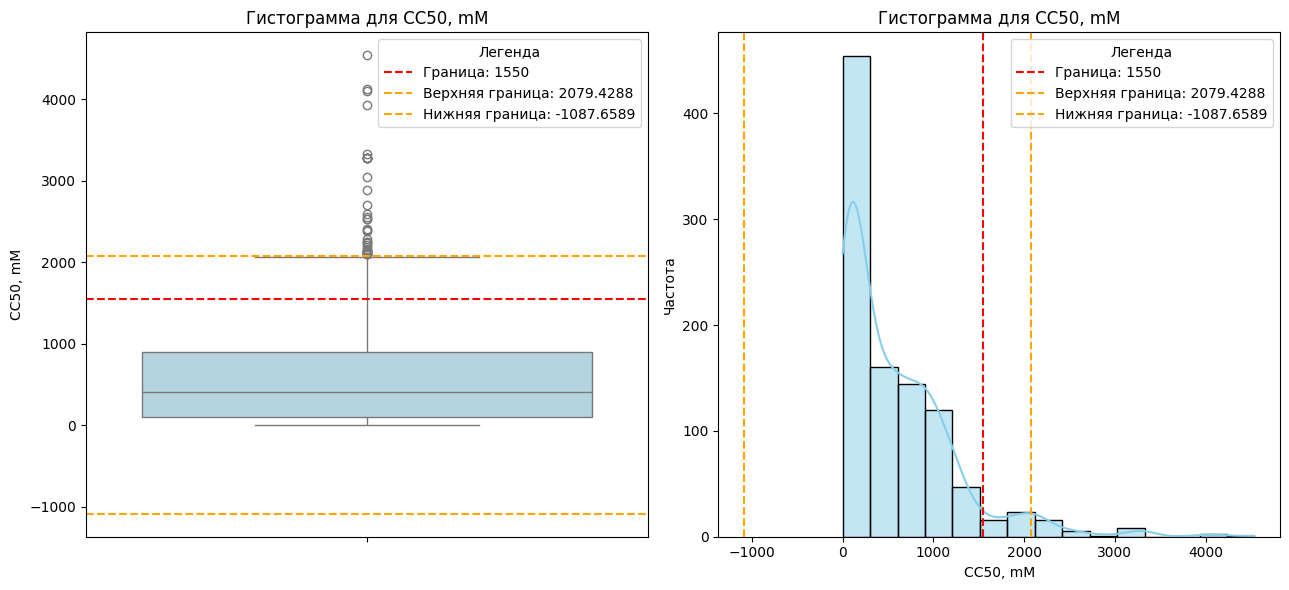

In [114]:
# Создаем Гистограммы
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# Гистограмма
sns.boxplot(y=df[target], color='lightblue', ax=axs[0])
axs[0].axhline(1550, color='red', linestyle='--', label=f'Граница: 1550')
axs[0].axhline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
axs[0].axhline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
axs[0].set_title(f'Гистограмма для {target}')
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')

# Гистограмма
sns.histplot(df[target], bins=15, color='skyblue', kde=True, ax=axs[1])
axs[1].axvline(1550, color='red', linestyle='--', label=f'Граница: 1550')
axs[1].axvline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
axs[1].axvline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
axs[1].set_title(f'Гистограмма для {target}')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')
axs[1].set_ylabel('Частота')  # Название оси Y для гистограммы
# Отображаем графики
plt.tight_layout()
plt.show()

In [93]:
# Подсчет количества значений выше границ
count_higher_than_upper_bound = df[df[target] > upper_bound].shape[0]

print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"%: {count_higher_than_upper_bound / df.shape[0] * 100:.4f}")

Количество значений выше верхней границы: 39. %: 3.9078


In [90]:
# Фильтрация значений не входящих в границы
df_filtered = df[df[target] <= 1550]

In [94]:
# Корреляционный анализ
correlations = df_filtered.corr()[target].sort_values()
corr_map = {column: correlation for column, correlation in correlations.items()
                            if column != target and abs(correlation) >= 0.2}
print(f"Корреляции между {target} и")
for col, corr in corr_map.items():
   print(f"{col} составляет: \t{corr:.4f}")

Корреляции между CC50, mM и
VSA_EState4 составляет: 	-0.2648
fr_NH2 составляет: 	-0.2478
PEOE_VSA7 составляет: 	-0.2123
FpDensityMorgan1 составляет: 	0.2007
NumSaturatedHeterocycles составляет: 	0.2396
IC50, mM составляет: 	0.6410


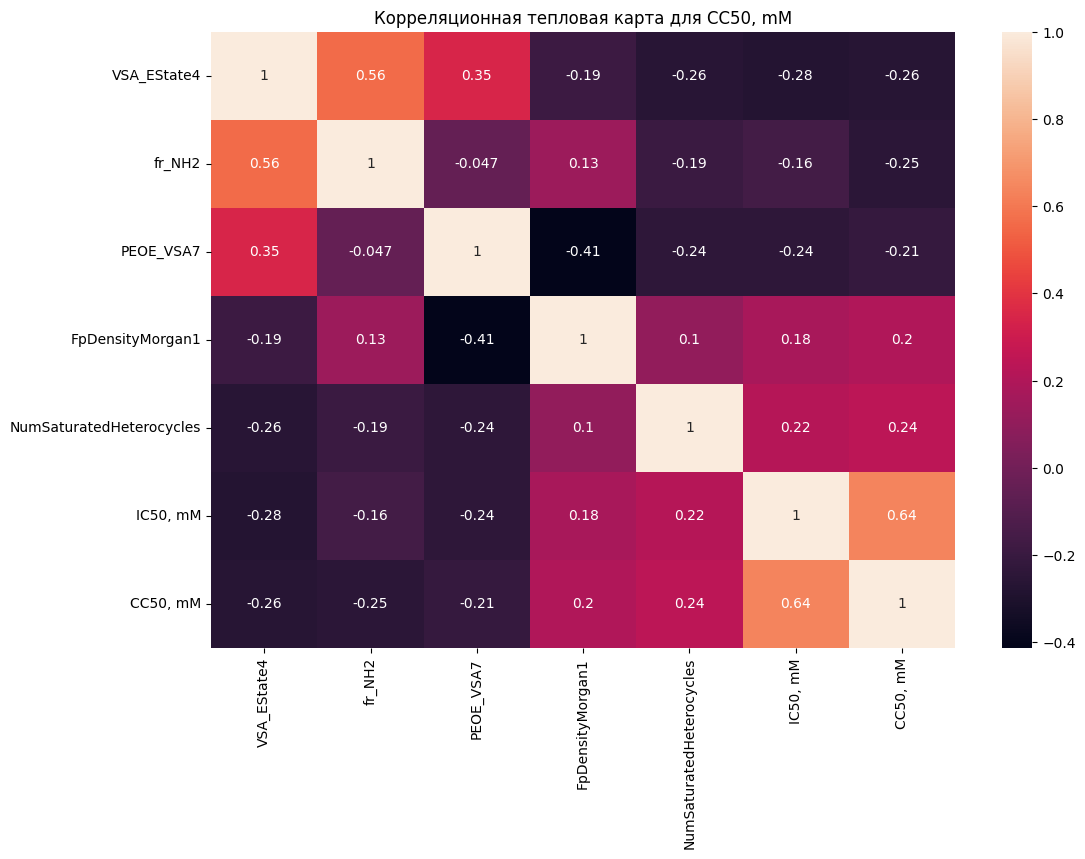

In [95]:
# Визуализация корреляций
df_filtered_corr = df_filtered[list(corr_map.keys()) + [target]]
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered_corr.corr(), annot=True)
plt.title(f'Корреляционная тепловая карта для {target}')
plt.show()

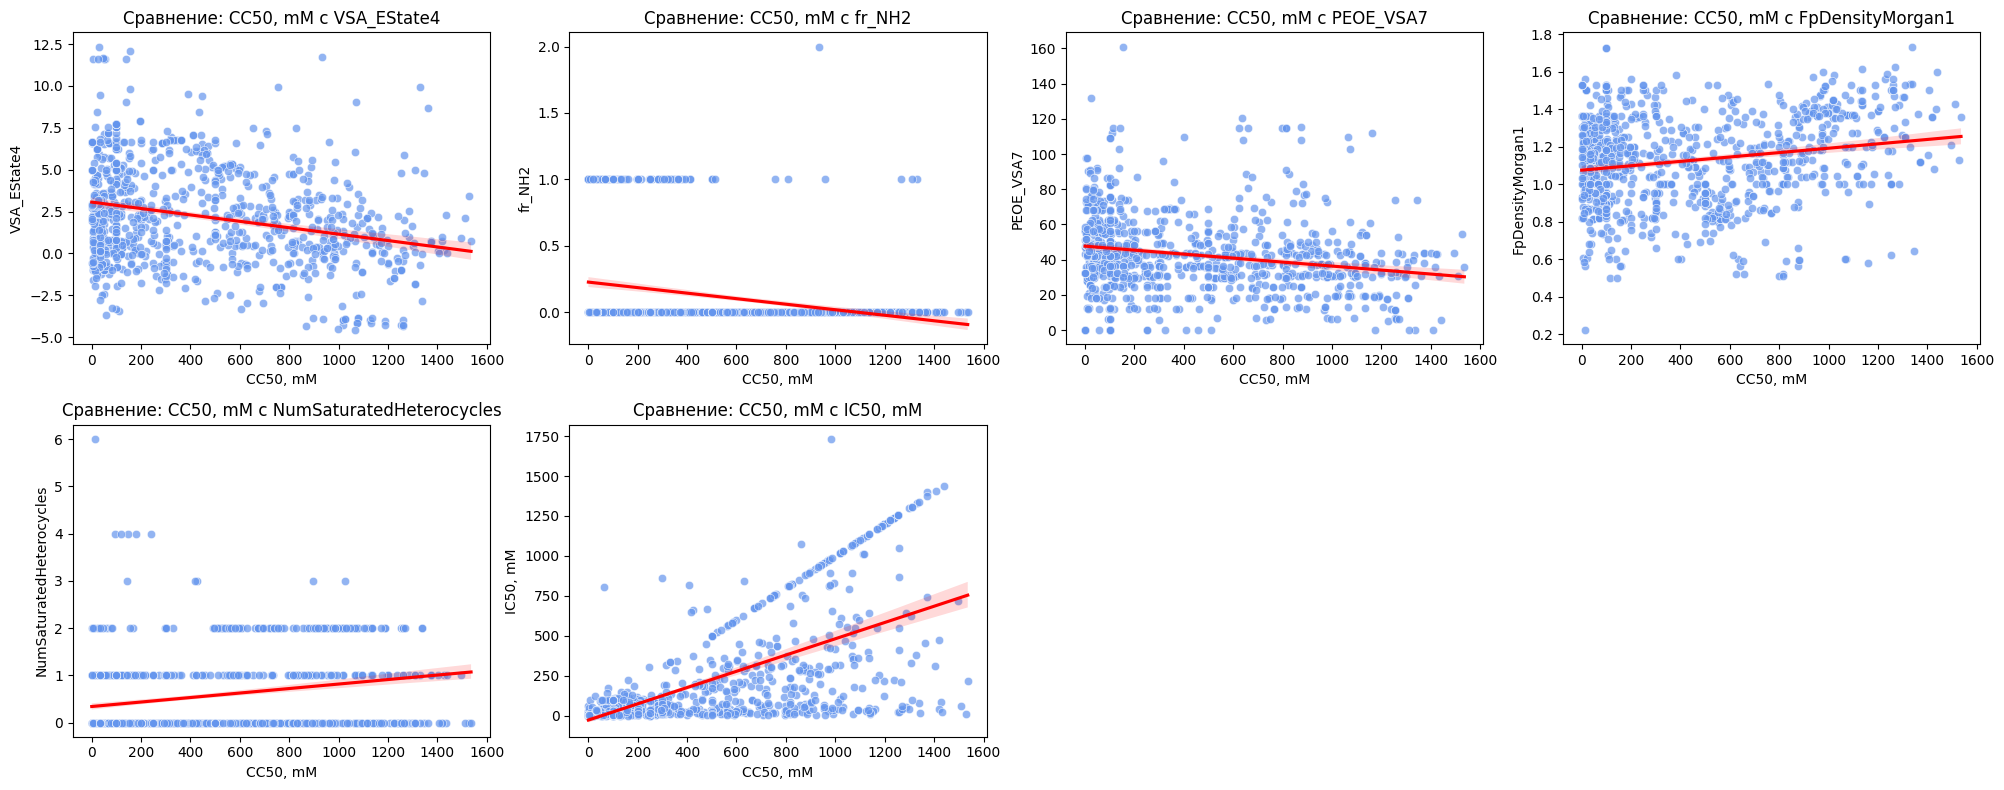

In [96]:
# Определяем размерность фигуры на основе количества подграфиков
x_size = 4
y_size = (len(corr_map) + x_size - 1) // x_size
fig, axes = plt.subplots(y_size, x_size, figsize=(20, y_size * 4))
axes = axes.flatten()

# Проходимся по каждому из коррелирующих признаков
for i, (col, _) in enumerate(corr_map.items()):
    sns.scatterplot(data=df_filtered, x=target, y=col, ax=axes[i], color='cornflowerblue', alpha=0.7)
    axes[i].set_title(f'Сравнение: {target} с {col}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

    # Добавляем линию регрессии для дополнительных данных
    sns.regplot(data=df_filtered, x=target, y=col, ax=axes[i],  scatter=False, color='red')
# Удаляем пустые подграфики, если они есть
for j in range(len(corr_map), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Анализ SI**

In [146]:
# Описательная статистика
target = 'SI'
print(f"Описательная статистика для {target}:")
df[target].describe()

Описательная статистика для SI:


,SI
count,998.000000
mean,72.650005
std,685.504279
min,0.011489
25%,1.457233
50%,3.856410
75%,16.525000
max,15620.600000


In [147]:
# Описательная статистика после фильтрации
print("Статистика после фильтрации SI:")
print(df[target].describe())

Статистика после фильтрации SI:
count      998.000000
mean        72.650005
std        685.504279
min          0.011489
25%          1.457233
50%          3.856410
75%         16.525000
max      15620.600000
Name: SI, dtype: float64


In [148]:
# Вычисляем верхнюю и нижнюю границу
Q3, Q1 = np.percentile(df[target],[75, 25])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

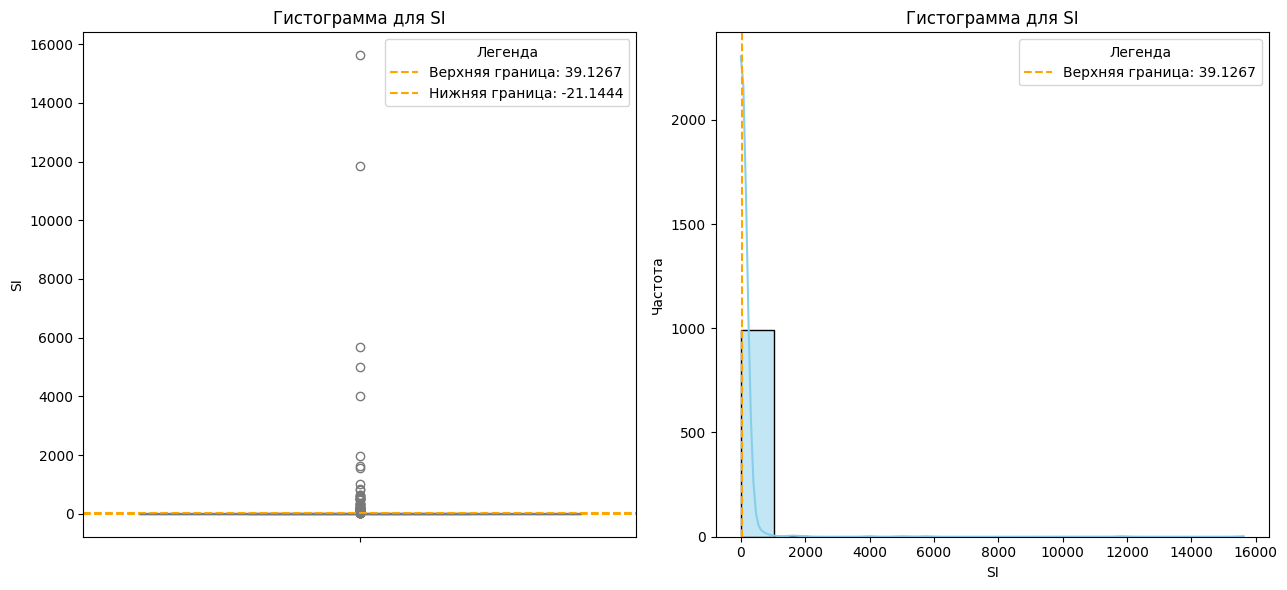

In [149]:
# Создаем Гистограммы
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# Гистограмма
sns.boxplot(y=df[target], color='lightblue', ax=axs[0])
axs[0].axhline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
axs[0].axhline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
axs[0].set_title(f'Гистограмма для {target}')
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')

# Гистограмма
sns.histplot(df[target], bins=15, color='skyblue', kde=True, ax=axs[1])
axs[1].axvline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')

axs[1].set_title(f'Гистограмма для {target}')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Легенда')
axs[1].set_ylabel('Частота')  # Название оси Y для гистограммы
# Отображаем графики
plt.tight_layout()
plt.show()

In [150]:
# Подсчет значений выше верхней границы
count_higher_than_upper_bound = df[df[target] > upper_bound].shape[0]
print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"Процент: {count_higher_than_upper_bound / df.shape[0] * 100:.4f}%")

Количество значений выше верхней границы: 124. Процент: 12.4248%


In [159]:
# Фильтрация значений не входящих в границы
df_filtered = df[df[target] <= upper_bound]

In [160]:
# Корреляционный анализ
correlations = df_filtered.corr()[target].sort_values()
corr_map = {column: correlation for column, correlation in correlations.items()
                            if column != target and abs(correlation) >= 0.2}
print(f"Корреляции между {target} и")
for col, corr in corr_map.items():
   print(f"{col} составляет: \t{corr:.4f}")

Корреляции между SI и
IC50, mM составляет: 	-0.3348
fr_Imine составляет: 	0.2479


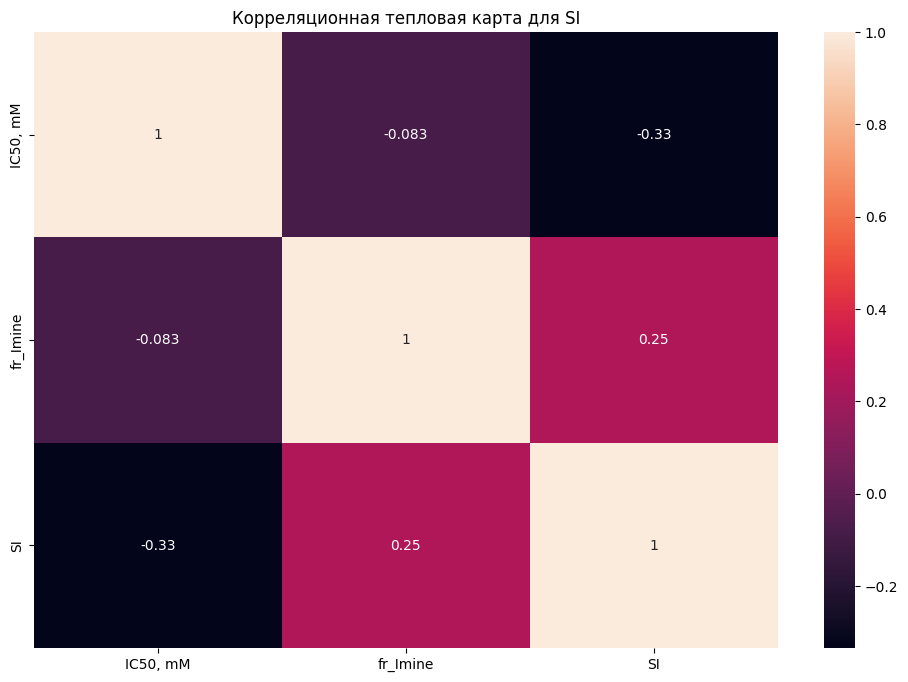

In [161]:
# Визуализация корреляций
df_filtered_corr = df_filtered[list(corr_map.keys()) + [target]]
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered_corr.corr(), annot=True)
plt.title(f'Корреляционная тепловая карта для {target}')
plt.show()

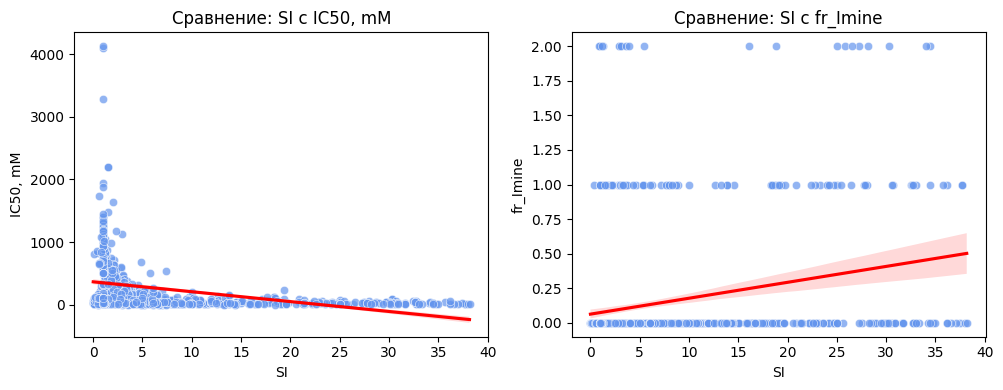

In [162]:
# Определяем размерность фигуры на основе количества подграфиков
x_size = 4
y_size = (len(corr_map) + x_size - 1) // x_size
fig, axes = plt.subplots(y_size, x_size, figsize=(20, y_size * 4))
axes = axes.flatten()

# Проходимся по каждому из коррелирующих признаков
for i, (col, _) in enumerate(corr_map.items()):
    sns.scatterplot(data=df_filtered, x=target, y=col, ax=axes[i], color='cornflowerblue', alpha=0.7)
    axes[i].set_title(f'Сравнение: {target} с {col}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

    # Добавляем линию регрессии для дополнительных данных
    sns.regplot(data=df_filtered, x=target, y=col, ax=axes[i],  scatter=False, color='red')
# Удаляем пустые подграфики, если они есть
for j in range(len(corr_map), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Корреляционный анализ показывает, что признак SI имеет значимую корреляцию только с IC50 и fr_Imine.

fr_Imine — это дескриптор, который подсчитывает количество иминных групп в молекуле. Он указывает на:

- Потенциал ковалентного связывания
- Реакционную способность молекулы
- Метаболическую лабильность
- Необходимость дополнительной оценки безопасности